In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.2 MB/s eta 0:00:00


Importing the packages needed

In [ ]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import RFE
import itertools
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

Analysing the dataset given

In [ ]:
df = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

Checking if there are any null values

In [ ]:
print(df.isnull().values.any())

False


Calculates the number of duplicate rows

In [ ]:
df.duplicated().sum()

0

Checks for rows in the dataframe where all values are equal to zero

In [ ]:
(df==0).any(axis=1).sum()

25192

Checks for column in the data frame where atleast one value is 0

In [ ]:
(df == 0).any(axis=0)

duration                        True
protocol_type                  False
service                        False
flag                           False
src_bytes                       True
dst_bytes                       True
land                            True
wrong_fragment                  True
urgent                          True
hot                             True
num_failed_logins               True
logged_in                       True
num_compromised                 True
root_shell                      True
su_attempted                    True
num_root                        True
num_file_creations              True
num_shells                      True
num_access_files                True
num_outbound_cmds               True
is_host_login                   True
is_guest_login                  True
count                          False
srv_count                      False
serror_rate                     True
srv_serror_rate                 True
rerror_rate                     True
s

In [ ]:
df.shape

(25192, 42)

In [ ]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


Some visual representations:

<Axes: xlabel='class', ylabel='count'>

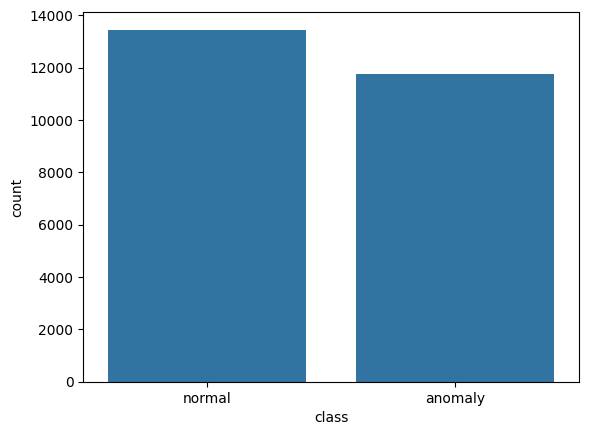

In [ ]:
sns.countplot(x=df['class'])

In [ ]:
train = pd.read_csv('Train_data.csv')
train.head()

X = train.drop(['class'],axis=1)
Y = train['class']

In [ ]:
categorical_features = ['protocol_type','service','flag']
for i in categorical_features:
  unique_values = train[i].unique()
  print(f'{i}')
  print(unique_values)
  print(f'No. of unique values: {len(unique_values)}\n')

protocol_type
['tcp' 'udp' 'icmp']
No. of unique values: 3

service
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']
No. of unique values: 66

flag
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
No. of unique values: 11



In [ ]:
for i in categorical_features:
  counts = train[i].value_counts()
  figure = go.Figure()
  figure.add_trace(go.Pie(labels=counts.index,values=counts))

  figure.update_traces(textposition='inside')
  figure.update_layout(title=f"Pie Chart of {i}",uniformtext_minsize=12,uniformtext_mode='hide')

  figure.show()


In [ ]:
counts = pd.DataFrame(Y).value_counts()
figure = go.Figure()
figure.add_trace(go.Pie(labels=counts.index,values=counts))

figure.update_traces(textposition='inside')
figure.update_layout(uniformtext_minsize=12,uniformtext_mode='hide')

figure.show()

In [ ]:
def label_encoding(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      label_encoder=LabelEncoder()
      df[col]=label_encoder.fit_transform(df[col])


label_encoding(df)
label_encoding(test)

In [ ]:
df.drop(['num_outbound_cmds'],axis=1,inplace=True)
test.drop(['num_outbound_cmds'],axis=1,inplace=True)

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
X_train = df.drop(['class'],axis=1)
Y_train = df['class']

In [ ]:
rfc = RandomForestClassifier()
rfe=RFE(rfc,n_features_to_select=10)
rfe=rfe.fit(X_train,Y_train)


feature = [(i,v) for i,v in itertools.zip_longest(rfe.get_support(),X_train.columns)]
selected_features = [v for i,v in feature if i==True]

print(selected_features)

['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate']


In [ ]:
X_train = X_train[selected_features]

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.80, random_state=2)

In [ ]:
def objective(trial):
  k = trial.suggest_categorical('kernel',['linear','rbf','poly','linearSVC'])
  c = trial.suggest_float('c',0.02,1.0,step=0.02)

  if k in ['linear','rbf']:
      classifier = SVC(kernel=k,C=c).fit(x_train,y_train)
  elif k == 'linearSVC':
      classifier = LinearSVC(C=c).fit(x_train,y_train)
  elif k == 'poly':
      d = trial.suggest_int('d',2,10)
      classifier = SVC(kernel=k,C=c,degree=d).fit(x_train,y_train)

  accuracy = classifier.score(x_test,y_test)
  return accuracy

In [ ]:
tune_svm = optuna.create_study(direction='maximize')
tune_svm.optimize(objective,n_trials=20)

print(tune_svm.best_trial)

[I 2024-04-05 03:57:52,362] A new study created in memory with name: no-name-c4cecbb8-776a-464e-9ebb-1312f5fb4f0b
[I 2024-04-05 03:57:55,361] Trial 0 finished with value: 0.9630879142687041 and parameters: {'kernel': 'poly', 'c': 0.30000000000000004, 'd': 3}. Best is trial 0 with value: 0.9630879142687041.
[I 2024-04-05 03:58:01,702] Trial 1 finished with value: 0.9384798571145069 and parameters: {'kernel': 'poly', 'c': 0.38, 'd': 6}. Best is trial 0 with value: 0.9630879142687041.
[I 2024-04-05 03:58:05,810] Trial 2 finished with value: 0.9662631474498908 and parameters: {'kernel': 'rbf', 'c': 0.6}. Best is trial 2 with value: 0.9662631474498908.
[I 2024-04-05 03:58:10,527] Trial 3 finished with value: 0.9666600515975392 and parameters: {'kernel': 'rbf', 'c': 0.42000000000000004}. Best is trial 3 with value: 0.9666600515975392.
[I 2024-04-05 03:58:21,129] Trial 4 finished with value: 0.926969636832705 and parameters: {'kernel': 'linear', 'c': 0.34}. Best is trial 3 with value: 0.96666

FrozenTrial(number=5, state=TrialState.COMPLETE, values=[0.9678507640404842], datetime_start=datetime.datetime(2024, 4, 5, 3, 58, 21, 132283), datetime_complete=datetime.datetime(2024, 4, 5, 3, 58, 24, 628176), params={'kernel': 'rbf', 'c': 1.0}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'kernel': CategoricalDistribution(choices=('linear', 'rbf', 'poly', 'linearSVC')), 'c': FloatDistribution(high=1.0, log=False, low=0.02, step=0.02)}, trial_id=5, value=None)


In [ ]:
if tune_svm.best_trial.params['kernel'] in ['linear','rbf']:
  model = SVC(kernel=tune_svm.best_trial.params['kernel'],C=tune_svm.best_trial.params['c'])

elif tune_svm.best_trial.params['kernel'] == 'linearSVC':
  model = LinearSVC(C=tune_svm.best_trial.params['c'])
elif tune_svm.best_trial.params['kernel'] == 'poly':
  model = SVC(kernel=tune_svm.best_trial.params['kernel'],C=tune_svm.best_trial.params['c'], degree=tune_svm.best_trial.params['degree'])


model.fit(x_train,y_train)

SVC()

In [ ]:
SVM_train, SVM_test = model.score(x_train , y_train), model.score(x_test , y_test)

print(f"Training Score: {SVM_train}")
print(f"Test Score: {SVM_test}")

Training Score: 0.9693345903835657
Test Score: 0.9678507640404842


In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9679
Precision: 0.9582
Recall: 0.9830


In [ ]:
score_difference = SVM_train - accuracy
print(f"\nTraining Score: {SVM_train:.4f}")
print(f"Test Score: {accuracy:.4f}")
print(f"Score Difference: {score_difference:.4f}")


Training Score: 0.9693
Test Score: 0.9679
Score Difference: 0.0015


In [ ]:
if score_difference > 0.1:
    print("Warning: Significant difference between training and test scores. This could indicate overfitting.")
else:
    print("Training and test scores are relatively close, suggesting good generalization.")

Training and test scores are relatively close, suggesting good generalization.
